<a href="https://colab.research.google.com/github/kkmax1015/Kaggle/blob/main/Titanic/4_EDA(%E6%8E%A2%E7%B4%A2%E7%9A%84%E3%83%87%E3%83%BC%E3%82%BF%E8%A7%A3%E6%9E%90)_%EF%BC%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Googleドライブへのマウント
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Titanic/'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Titanic
 1_SampleNoteBook_LogisticRegression	   '4_EDA(探索的データ解析)_１.ipynb'
 2_欠損値とカテゴリー変数の取り扱い.ipynb   data
 3_モデルの評価方法.ipynb		    output


# 目標：データの特徴や傾向を理解して、良い学習データを作成する

ここまで感覚的に特徴量の取捨選択をしてきたが、主観で判断すると実はモデルの予測に有効な特徴量を落としてしまう可能性がある。

良いモデルを作る為にはデータを解析して、徴や傾向を把握し、自分なりの仮説を立てた上で学習に使用する特徴量を判断し、データを作成することが重要となる。

###  1.相関係数をヒートマップで表示する

まずは相関係数をヒートマップで表示し、各特徴量と目的変数の相関をチェックしてみる。

相関係数については統計学の領域となる、正しい定義は書籍等で正確な情報を得たほうが良いが、物凄くざっくりと言うと「2つの要素の直線的な相関関係の強弱を表すもの」であり、以下の特徴を持つ。

ex)特定地域の雨の日数と降水量。特定の地域において雨の日が増えればその地域の降水量も増加すると考えられ、両者は比例すると想定され、相関係数は1に近い数値が出ると思われる。

*   -1から1までのいずれかの値をとる
*   1に近いほど相関が強く、0に近いほど相関が弱い
*   0に近くても、何らかの関係がある場合がある

In [2]:
# ライブラリをImportする
import pandas as pd
import numpy as np

# CSVデータをPandasデータフレームへ読み込む
train = pd.read_csv("./data/train.csv");
test = pd.read_csv("./data/test.csv");
submit = pd.read_csv("./data/gender_submission.csv");

data = train.drop('Survived',axis=1)
data = pd.concat([data,test],join='inner')

In [3]:
# それぞれのデータの件数を算出する
print(len(train), len(test),len(submit))

891 418 418


In [4]:
# NULLチェック
# 今回は目的変数が必要なので、trainのみを対象とする
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Stringは取り扱えないので、これまで同様に前処理を行う

# カテゴリー変数の変換
# 前回は欠損値を埋めたが、分析の段階で恣意的な数値は入れたくないので欠損値のまま残す
train['Sex'].replace(['male','female'], [0, 1], inplace=True)
train['Embarked'].replace(['S','C','Q'], [0, 1, 2], inplace=True)

In [6]:
pd.set_option('display.max_rows', 900)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,NaN,1.0


これまで取り扱ってこなかったNameに着目してデータを眺めると、実はどのカラムも敬称（MrやMsなど）が入っていることが分かる。その為、この敬称別にカテゴリー変数へ変換することで特徴量として取り扱う。

In [7]:
# 敬称別のカテゴリー変数へ変換する
train['Name'] = ['0' if 'Master' in name else name for name in train['Name']]
train['Name'] = ['1' if 'Mr' in name else name for name in train['Name']]
train['Name'] = ['2' if 'Miss' in name else name for name in train['Name']]
train['Name'] = ['3' if 'Ms' in name else name for name in train['Name']]
train['Name'] = ['4' if 'Mrs' in name else name for name in train['Name']]
train['Name'] = ['5' if 'Mme' in name else name for name in train['Name']]
train['Name'] = ['6' if 'Don' in name else name for name in train['Name']]
train['Name'] = ['7' if 'Dr' in name else name for name in train['Name']]
train['Name'] = ['8' if 'Rev' in name else name for name in train['Name']]
train['Name'] = ['9' if 'Col' in name else name for name in train['Name']]
train['Name'] = ['10' if 'Mlle' in name else name for name in train['Name']]
train['Name'] = ['11' if 'Jonkheer' in name else name for name in train['Name']]
train['Name'] = ['12' if 'Countess' in name else name for name in train['Name']]
train['Name'] = ['13' if 'Capt' in name else name for name in train['Name']]
train['Name'] = ['14' if 'Major' in name else name for name in train['Name']]
train['Name'] = ['15' if 'Mme' in name else name for name in train['Name']]

# 最後に文字列から数値型に変換する
train['Name'] = pd.to_numeric(train['Name'], errors="coerce")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,2,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,1,1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,1,0,35.0,0,0,373450,8.0500,NaN,0.0


次にチケットだが、これは文字が入っているものと入っていないものに分かれていることが分かる。この2種類のカテゴリー変数にするのも一つの選択肢だが、今回は文字を削除することで対応してみる。

In [9]:
import re
 
# 正規表現でアルファベットを削除して数字のみにする
train['Ticket'] = train['Ticket'].str.replace(r'[^0-9]', r'', regex=True)
train['Ticket'] = train['Ticket'].str.replace(r' ', r'', regex=True)
train['Ticket'] = pd.to_numeric(train['Ticket'], errors="coerce")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,521171.0,7.2500,NaN,0.0
1,2,1,1,1,1,38.0,1,0,17599.0,71.2833,C85,1.0
2,3,1,3,2,1,26.0,0,0,23101282.0,7.9250,NaN,0.0
3,4,1,1,1,1,35.0,1,0,113803.0,53.1000,C123,0.0
4,5,0,3,1,0,35.0,0,0,373450.0,8.0500,NaN,0.0


客室番号についても数値のみとすることも出来るし、アルファベットのみとすることも出来る。

今回はアルファベットのカテゴリー変数へ変換する。

In [10]:
# まずアルファベットのみを正規表現で切り出す
train['Cabin'] = train['Cabin'].str.replace(r'[0-9]', r'', regex=True)
train['Cabin'] = train['Cabin'].str[:1]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,521171.0,7.2500,NaN,0.0
1,2,1,1,1,1,38.0,1,0,17599.0,71.2833,C,1.0
2,3,1,3,2,1,26.0,0,0,23101282.0,7.9250,NaN,0.0
3,4,1,1,1,1,35.0,1,0,113803.0,53.1000,C,0.0
4,5,0,3,1,0,35.0,0,0,373450.0,8.0500,NaN,0.0


In [11]:
print(train['Cabin'].unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [12]:
# アルファベットを数値へ変換
train['Cabin'].replace(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,521171.0,7.2500,NaN,0.0
1,2,1,1,1,1,38.0,1,0,17599.0,71.2833,0.0,1.0
2,3,1,3,2,1,26.0,0,0,23101282.0,7.9250,NaN,0.0
3,4,1,1,1,1,35.0,1,0,113803.0,53.1000,0.0,0.0
4,5,0,3,1,0,35.0,0,0,373450.0,8.0500,NaN,0.0


In [13]:
# すべてのカラムが数値型であることのチェック
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object

これで全ての変数を取り扱える状態となったので、相関係数をヒートマップとして表示してみる。



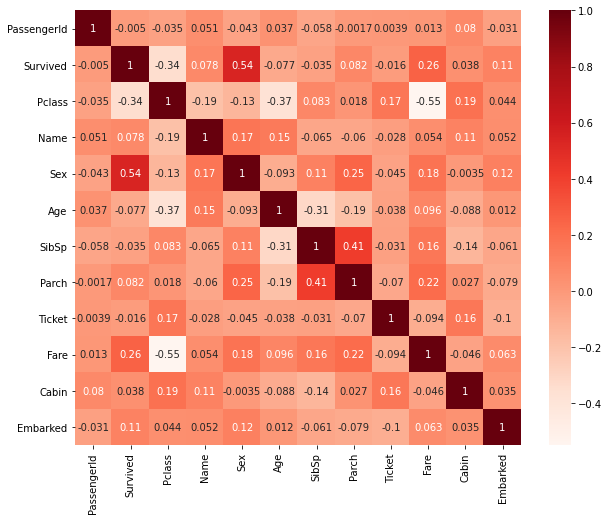

In [14]:
# データの相関係数をヒートマップで表示する
import matplotlib.pyplot as plt
import seaborn as sns

# ヒートマップを出力
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='Reds')
plt.show()

|変数名|定義|値の意味|
|-|-|-|
|PassengerId|乗客ID|
|Servived|生存ラベル|0 = 死亡、1 = 生存|
|Pclass|チケットクラス|1 = 1等室、2 = 2等室、3 = 3等室|
|Name|乗客名|
|Sex|性別|
|Age|年齢|
|SibSp|タイタニックに同乗している兄弟/配偶者の数|
|Parch|タイタニックに同乗している親/子供の数|
|Ticket|チケット番号|
|Fare|旅客運賃|
|Cabin|客室番号|
|Embarked|出港地（タイタニックへ乗った港）|C =シェルブール、Q =クイーンズタウン、S =サウサンプトン|

相関係数を確認すると、ServivedとSexの相関が比較的に高く、性別が生死を予測するのに比較的有用であるという仮説を立てることが出来る。また、SibSpとParchやFareとEmbarkedにも比較的相関があることが分かる。

今回該当するものは存在しなかったが、相関係数を確認した際、かなり高い相関（0.9以上くらい）があった場合、学習に悪影響を及ぼす場合があるので削除することも検討する。（細かな理由は多重共線性で検索すると良い）

せっかく全ての変数を取り扱えるようにしたので、試しに学習させてみる。

In [15]:
# データ作成
data['Sex'].replace(['male','female'], [0, 1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0, 1, 2], inplace=True)

data['Name'] = ['0' if 'Master' in name else name for name in data['Name']]
data['Name'] = ['1' if 'Mr' in name else name for name in data['Name']]
data['Name'] = ['2' if 'Miss' in name else name for name in data['Name']]
data['Name'] = ['3' if 'Ms' in name else name for name in data['Name']]
data['Name'] = ['4' if 'Mrs' in name else name for name in data['Name']]
data['Name'] = ['5' if 'Mme' in name else name for name in data['Name']]
data['Name'] = ['6' if 'Don' in name else name for name in data['Name']]
data['Name'] = ['7' if 'Dr' in name else name for name in data['Name']]
data['Name'] = ['8' if 'Rev' in name else name for name in data['Name']]
data['Name'] = ['9' if 'Col' in name else name for name in data['Name']]
data['Name'] = ['10' if 'Mlle' in name else name for name in data['Name']]
data['Name'] = ['11' if 'Jonkheer' in name else name for name in data['Name']]
data['Name'] = ['12' if 'Countess' in name else name for name in data['Name']]
data['Name'] = ['13' if 'Capt' in name else name for name in data['Name']]
data['Name'] = ['14' if 'Major' in name else name for name in data['Name']]
data['Name'] = ['15' if 'Mme' in name else name for name in data['Name']]

data['Ticket'] = data['Ticket'].str.replace(r'[^0-9]', r'', regex=True)
data['Ticket'] = data['Ticket'].str.replace(r' ', r'', regex=True)
data['Ticket'] = pd.to_numeric(data['Ticket'], errors="coerce")

data['Cabin'] = data['Cabin'].str.replace(r'[0-9]', r'', regex=True)
data['Cabin'] = data['Cabin'].str[:1]
data['Cabin'].replace(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,0,22.0,1,0,521171.0,7.2500,NaN,0.0
1,2,1,1,1,38.0,1,0,17599.0,71.2833,0.0,1.0
2,3,3,2,1,26.0,0,0,23101282.0,7.9250,NaN,0.0
3,4,1,1,1,35.0,1,0,113803.0,53.1000,0.0,0.0
4,5,3,1,0,35.0,0,0,373450.0,8.0500,NaN,0.0


In [16]:
# 欠損値補完
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Embarked'].fillna(0, inplace=True)

data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            4
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
# 一番多い数を確認
data['Cabin'].value_counts()

0.0    94
5.0    65
3.0    46
1.0    41
4.0    22
6.0    21
2.0     5
7.0     1
Name: Cabin, dtype: int64

In [18]:
data['Cabin'].fillna(0, inplace=True)
data['Ticket'].fillna(-1, inplace=True)

In [19]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
y_data = train['Survived']
X_data = data[:len(train)]
X_test = data[len(train):]
X_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,0,22.0,1,0,521171.0,7.2500,0.0,0.0
1,2,1,1,1,38.0,1,0,17599.0,71.2833,0.0,1.0
2,3,3,2,1,26.0,0,0,23101282.0,7.9250,0.0,0.0
3,4,1,1,1,35.0,1,0,113803.0,53.1000,0.0,0.0
4,5,3,1,0,35.0,0,0,373450.0,8.0500,0.0,0.0


In [21]:
# CrossValidationで精度を見てみる
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# 層化抽出による分割
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)

# 5回分のスコアを入れる配列を用意
scores = []


# 5回学習
for train_index, val_index in skf.split(X_data, y_data):
  X_train, X_val = X_data.iloc[train_index], X_data.iloc[val_index]
  y_train, y_val = y_data.iloc[train_index], y_data.iloc[val_index]

  # 学習モデルは毎回初期化する（重要）
  clf = LogisticRegression(random_state=0)
  clf.fit(X_train,y_train)

  # スコアを配列に格納
  scores.append(clf.score(X_val, y_val))

In [22]:
# 配列の中身を表示
print(scores)

# 平均値を表示
print(f'Cross Validation score：{np.mean(scores):.5f}')

[0.6145251396648045, 0.6179775280898876, 0.6179775280898876, 0.6123595505617978, 0.6123595505617978]
Cross Validation score：0.61504


Cross Validation scoreが大幅に低下しており、テストデータへのスコアも大幅に悪くなったと想定される。

In [23]:
y_pred = clf.predict(X_test)
sub = submit
sub['Survived'] = y_pred
sub.to_csv('./output/submission.csv', index=False)

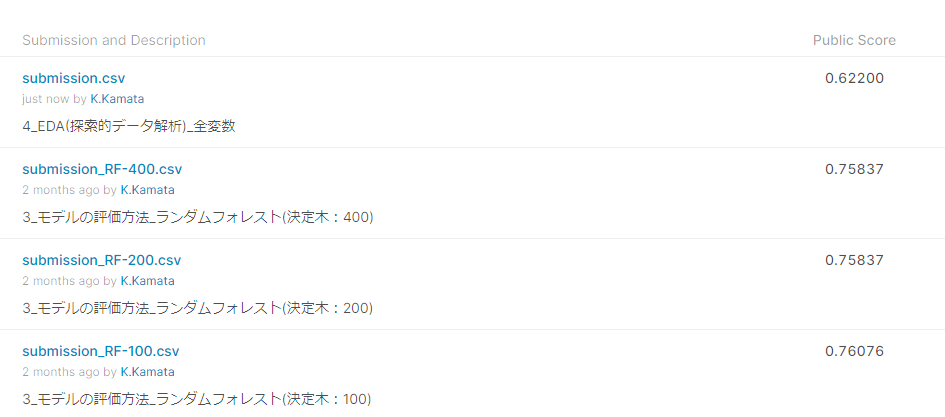

実際に提出するとスコアは大幅に下がっており、欠損値の補完の仕方や使用する変数の再選定等を検討する必要があることが分かる。

###  2.RandomForestによる特徴量の重要度の算出

ランダムフォレストに代表される決定木ベースのアンサンブル分析器では，特徴量の重要度を算出することが出来る。

検討のとっかかりとして可視化してみる場合があるので紹介する。

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=0)
rf.fit(X_data, y_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

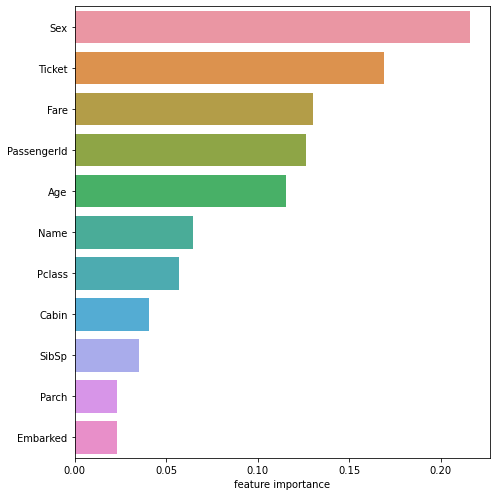

In [25]:
# 特徴量の重要度を確認
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x=rf.feature_importances_[ranking], y=X_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

このような形でどの特徴量がどれだけ寄与したのかを確認することが出来る。ランダムフォレストの他、LightGBMやxgboostといった強力なアルゴリズムでも同様に確認することが出来る。

上図はあくまでランダムフォレストの中での寄与度を表した参考情報だが、複数の決定木ベースのアルゴリズムで算出し、見比べてみると重要な特徴量の傾向を把握することの参考となる。